In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

sales    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
sales.describe(percentiles=[0.03, 0.25, 0.5, 0.75, 0.97])

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
3%,0.000000e+00,4.000000e+00,1.307000e+03,7.900000e+01,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
97%,3.200000e+01,5.800000e+01,2.144000e+04,3.190000e+03,3.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


# Aggregate data

Text(0, 0.5, 'avg. price of items')

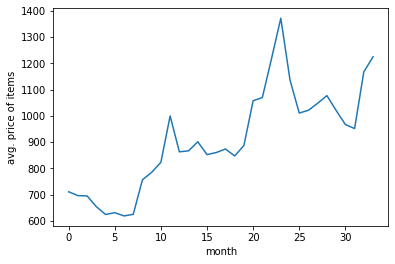

In [10]:
fig = sales.groupby("date_block_num")["item_price"].mean().plot.line()
fig.set_xlabel("month")
fig.set_ylabel("avg. price of items")

Text(0, 0.5, '# of items')

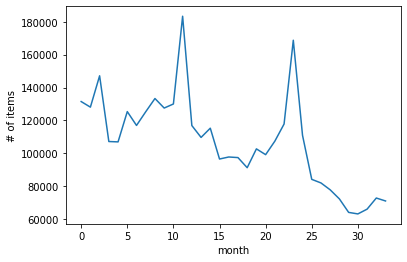

In [6]:
fig = sales.groupby("date_block_num")["item_cnt_day"].sum().plot.line()
fig.set_xlabel("month")
fig.set_ylabel("# of items")

In [51]:
all_data = sales.pivot_table(
    index=['shop_id','item_id'],
    values=['item_cnt_day'],
    columns=['date_block_num'],
    fill_value=0,
    aggfunc='sum').reset_index()
cols = [x[0] if x[1] == "" else f"{x[0]}_{x[1]}" for x in all_data.columns]
all_data.columns = cols
all_data

,shop_id,item_id,item_cnt_day_0,item_cnt_day_1,item_cnt_day_2,item_cnt_day_3,item_cnt_day_4,item_cnt_day_5,item_cnt_day_6,item_cnt_day_7,...,item_cnt_day_24,item_cnt_day_25,item_cnt_day_26,item_cnt_day_27,item_cnt_day_28,item_cnt_day_29,item_cnt_day_30,item_cnt_day_31,item_cnt_day_32,item_cnt_day_33
0,0,30,0,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,31,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,32,6,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,33,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35,1,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,22154,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424120,59,22155,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
424121,59,22162,0,0,0,0,0,0,0,0,...,0,9,4,1,1,0,0,1,0,0
424122,59,22164,0,0,0,0,0,0,0,0,...,0,2,1,2,0,0,1,0,0,0


In [52]:
for d in range(34):
    all_data["item_cnt_day_%s"%d] = all_data["item_cnt_day_%s"%d].map(lambda x: min(x, 20))

In [53]:
test = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))
train = pd.merge(test, all_data, on=["shop_id", "item_id"], how="left")
train

,ID,shop_id,item_id,item_cnt_day_0,item_cnt_day_1,item_cnt_day_2,item_cnt_day_3,item_cnt_day_4,item_cnt_day_5,item_cnt_day_6,...,item_cnt_day_24,item_cnt_day_25,item_cnt_day_26,item_cnt_day_27,item_cnt_day_28,item_cnt_day_29,item_cnt_day_30,item_cnt_day_31,item_cnt_day_32,item_cnt_day_33
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,214196,45,16188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214197,214197,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,214198,45,19648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
for item_id in train.item_id.unique():
    indices = train["item_id"] == item_id
    train_copy = train.loc[indices].copy()
    train_copy.fillna(train_copy.mean(), inplace=True)
    train.loc[indices] = train_copy

In [55]:
for shop_id in train.shop_id.unique():
    indices = train["shop_id"] == shop_id
    train_copy = train.loc[indices].copy()
    train_copy.fillna(train_copy.mean(), inplace=True)
    train.loc[indices] = train_copy

In [56]:
train

,ID,shop_id,item_id,item_cnt_day_0,item_cnt_day_1,item_cnt_day_2,item_cnt_day_3,item_cnt_day_4,item_cnt_day_5,item_cnt_day_6,...,item_cnt_day_24,item_cnt_day_25,item_cnt_day_26,item_cnt_day_27,item_cnt_day_28,item_cnt_day_29,item_cnt_day_30,item_cnt_day_31,item_cnt_day_32,item_cnt_day_33
0,0,5,5037,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000
1,1,5,5320,0.034308,0.075138,0.117338,0.08943,0.152498,0.152302,0.155988,...,0.500952,0.426255,0.443139,0.404592,0.434549,0.446163,0.460341,0.547214,0.550181,0.646246
2,2,5,5233,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,1.000000,3.000000,1.000000
3,3,5,5232,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
4,4,5,5268,0.034308,0.075138,0.117338,0.08943,0.152498,0.152302,0.155988,...,0.500952,0.426255,0.443139,0.404592,0.434549,0.446163,0.460341,0.547214,0.550181,0.646246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
214196,214196,45,16188,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000
214197,214197,45,15757,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
214198,214198,45,19648,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.500000,0.187500,0.187500,0.375000,0.250000,0.250000,0.125000,0.375000,0.187500,0.125000


In [57]:
X_train = train.values[:, 3:-2]
y_train = train.values[:, -2]
X_valid = train.values[:, 4:-1]
y_valid = train.values[:, -1]
X_test = train.values[:, 5:]

In [58]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape

((214200, 32), (214200,), (214200, 32), (214200,), (214200, 32))

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Reshape
from tensorflow.keras.metrics import RootMeanSquaredError

In [68]:
lstm_model = Sequential([
    Reshape(input_shape=(32,), target_shape=(32, 1,)),
    LSTM(units=128, return_sequences=True, recurrent_dropout=0.3),
    LSTM(units=128, recurrent_dropout=0.3),
    Dense(1)
])

In [69]:
lstm_model.compile(loss = 'mse',optimizer = 'adam', metrics = [RootMeanSquaredError()])
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 32, 1)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 32, 128)           66560     
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________


In [73]:

history = lstm_model.fit(X_train, y_train, batch_size = 128,validation_data=(X_valid, y_valid),epochs = 10)

Epoch 1/10
1674/1674 [==============================] - 203s 121ms/step - loss: 1.5928 - root_mean_squared_error: 1.2621 - val_loss: 1.9183 - val_root_mean_squared_error: 1.3850
Epoch 2/10
1674/1674 [==============================] - 203s 121ms/step - loss: 1.4158 - root_mean_squared_error: 1.1899 - val_loss: 1.8761 - val_root_mean_squared_error: 1.3697
Epoch 3/10
1674/1674 [==============================] - 205s 123ms/step - loss: 1.3368 - root_mean_squared_error: 1.1562 - val_loss: 1.7439 - val_root_mean_squared_error: 1.3206
Epoch 4/10
1674/1674 [==============================] - 200s 120ms/step - loss: 1.2873 - root_mean_squared_error: 1.1346 - val_loss: 1.7860 - val_root_mean_squared_error: 1.3364
Epoch 5/10
1674/1674 [==============================] - 206s 123ms/step - loss: 1.2651 - root_mean_squared_error: 1.1248 - val_loss: 1.7662 - val_root_mean_squared_error: 1.3290
Epoch 6/10
1674/1674 [==============================] - 205s 122ms/step - loss: 1.2429 - root_mean_squared_err

# Combine train and test for lag features

In [7]:
test = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))
test_date_block = monthly_data.date_block_num.max() + 1
test["date_block_num"] = test_date_block
monthly_data["ID"] = -1
all_data = monthly_data.append(test)
all_data.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,ID
139255,0,19,0,0.0,0.0,-1
141495,0,27,0,0.0,0.0,-1
144968,0,28,0,0.0,0.0,-1
142661,0,29,0,0.0,0.0,-1
138947,0,32,0,6.0,221.0,-1


# Remove outliers

In [8]:
def clip_by_value(x, min_val, max_val):
    return min(max(min_val, x), max_val)

In [9]:
all_data["item_cnt_month"] = all_data["item_cnt_month"].map(lambda x: clip_by_value(x, 0, 20))
all_data["item_price"] = all_data["item_price"].map(lambda x: clip_by_value(x, 0, 1000))

# Add lag features

In [10]:
index_cols = ['shop_id', 'item_id', 'date_block_num']
cols_to_rename = ["item_cnt_month", "item_price"]

shift_range = [1, 2, 3, 4, 5, 6, 12]
min_date_block = 12

lag_features = []

for month_shift in shift_range:
    all_data_shift = all_data[index_cols + cols_to_rename].copy()
    
    all_data_shift['date_block_num'] = all_data_shift['date_block_num'] + month_shift
    
    foo = lambda x: '{}_lag_{}'.format(x, month_shift) if x in cols_to_rename else x
    all_data_shift = all_data_shift.rename(columns=foo)

    lag_features += ['{}_lag_{}'.format(x, month_shift) for x in cols_to_rename]
    all_data = pd.merge(all_data, all_data_shift, on=index_cols, how='left').fillna(0)

del all_data_shift


In [11]:
print(lag_features)

['item_cnt_month_lag_1', 'item_price_lag_1', 'item_cnt_month_lag_2', 'item_price_lag_2', 'item_cnt_month_lag_3', 'item_price_lag_3', 'item_cnt_month_lag_4', 'item_price_lag_4', 'item_cnt_month_lag_5', 'item_price_lag_5', 'item_cnt_month_lag_6', 'item_price_lag_6', 'item_cnt_month_lag_12', 'item_price_lag_12']


# Split train and test data

In [12]:
train = all_data[all_data.date_block_num < test_date_block].copy()
del train["ID"]
test = all_data[all_data.date_block_num == test_date_block].copy()

In [13]:
train.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,item_cnt_month_lag_1,item_price_lag_1,item_cnt_month_lag_2,item_price_lag_2,item_cnt_month_lag_3,item_price_lag_3,item_cnt_month_lag_4,item_price_lag_4,item_cnt_month_lag_5,item_price_lag_5,item_cnt_month_lag_6,item_price_lag_6,item_cnt_month_lag_12,item_price_lag_12
0,0,19,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,27,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,32,0,6.0,221.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Add mean encoding

In [14]:
train = pd.merge(train, items[["item_id", "item_category_id"]], on=["item_id"], how="left")
test = pd.merge(test, items[["item_id", "item_category_id"]], on=["item_id"], how="left" )
train["shop_item_id"] = train["shop_id"].astype(str) + "-" + train["item_id"].astype(str)
test["shop_item_id"] = test["shop_id"].astype(str) + "-" + test["item_id"].astype(str)

In [15]:
target = "item_cnt_month"
alpha1 = 100
alpha2 = 10

target_mean = train[target].mean()
item_target_mean = train.groupby("item_id")[target].transform("mean")
item_target_count = train.groupby("item_id")[target].transform("count")
train["item_target_enc"] = (item_target_mean * item_target_count + target_mean * alpha1) / (item_target_count + alpha1)
train["item_target_enc"].fillna(target_mean, inplace=True)

shop_target_mean = train.groupby("shop_id")[target].transform("mean")
shop_target_count = train.groupby("shop_id")[target].transform("count")
train["shop_target_enc"] = (shop_target_mean * shop_target_count + target_mean * alpha1) / (shop_target_count + alpha1)
train["shop_target_enc"].fillna(target_mean, inplace=True)

cate_target_mean = train.groupby("item_category_id")[target].transform("mean")
cate_target_count = train.groupby("item_category_id")[target].transform("count")
train["cate_target_enc"] = (cate_target_mean * cate_target_count + target_mean * alpha1) / (cate_target_count + alpha1)
train["cate_target_enc"].fillna(target_mean, inplace=True)

shop_item_target_mean = train.groupby("shop_item_id")[target].transform("mean")
shop_item_target_count = train.groupby("shop_item_id")[target].transform("count")
train["shop_item_target_enc"] = (shop_item_target_mean * shop_item_target_count + target_mean * alpha2) / (shop_item_target_count + alpha2)
train["shop_item_target_enc"].fillna(target_mean, inplace=True)


In [16]:
train.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,item_cnt_month_lag_1,item_price_lag_1,item_cnt_month_lag_2,item_price_lag_2,item_cnt_month_lag_3,...,item_cnt_month_lag_6,item_price_lag_6,item_cnt_month_lag_12,item_price_lag_12,item_category_id,shop_item_id,item_target_enc,shop_target_enc,cate_target_enc,shop_item_target_enc
0,0,19,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,40,0-19,0.212579,0.687348,0.243834,0.271127
1,0,27,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19,0-27,0.085607,0.687348,0.701182,0.248533
2,0,28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30,0-28,0.163776,0.687348,1.077136,0.248533
3,0,29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23,0-29,0.099344,0.687348,0.638486,0.271127
4,0,32,0,6.0,221.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,40,0-32,1.223502,0.687348,0.243834,1.581867


In [17]:
item_target_enc_map = train.groupby("item_id")["item_target_enc"].first()
shop_target_enc_map = train.groupby("shop_id")["shop_target_enc"].first()
cate_target_enc_map = train.groupby("item_category_id")["cate_target_enc"].first()
shop_item_target_enc_map = train.groupby("shop_item_id")["shop_item_target_enc"].first()

test["item_target_enc"] = test["item_id"].map(item_target_enc_map)
test["item_target_enc"].fillna(target_mean, inplace=True)

test["shop_target_enc"] = test["shop_id"].map(shop_target_enc_map)
test["shop_target_enc"].fillna(target_mean, inplace=True)

test["cate_target_enc"] = test["item_category_id"].map(cate_target_enc_map)
test["cate_target_enc"].fillna(target_mean, inplace=True)

test["shop_item_target_enc"] = test["shop_item_id"].map(shop_item_target_enc_map)
test["shop_item_target_enc"].fillna(target_mean, inplace=True)

enc_features = ['item_target_enc', 'shop_target_enc', 'cate_target_enc', 'shop_item_target_enc']

In [18]:
test.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,ID,item_cnt_month_lag_1,item_price_lag_1,item_cnt_month_lag_2,item_price_lag_2,...,item_cnt_month_lag_6,item_price_lag_6,item_cnt_month_lag_12,item_price_lag_12,item_category_id,shop_item_id,item_target_enc,shop_target_enc,cate_target_enc,shop_item_target_enc
0,5,5037,34,0.0,0.0,0,0.0,0.0,1.0,749.5,...,1.0,1000.0,1.0,1000.0,19,5-5037,1.729459,0.180471,0.701182,0.665933
1,5,5320,34,0.0,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,55,5-5320,0.298240,0.180471,0.223777,0.298240
2,5,5233,34,0.0,0.0,2,1.0,1000.0,3.0,999.0,...,3.0,899.0,0.0,0.0,19,5-5233,1.322227,0.180471,0.701182,0.763671
3,5,5232,34,0.0,0.0,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23,5-5232,0.745956,0.180471,0.638486,0.306338
4,5,5268,34,0.0,0.0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20,5-5268,0.298240,0.180471,1.566275,0.298240


# Train/Validation split

In [19]:
valid_date_block  = test_date_block - 1
valid = train[train.date_block_num==valid_date_block].copy()
train = train[train.date_block_num < valid_date_block]
train = train[train.date_block_num >= min_date_block]

In [20]:
len(train), len(test)

(6186922, 214200)

In [21]:
features = lag_features + enc_features


# LightGBM

In [26]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_params = {
               'feature_fraction': 0.75,
               'metric': 'rmse',
               'nthread':1, 
               'min_data_in_leaf': 2**7, 
               'bagging_fraction': 0.75, 
               'learning_rate': 0.03, 
               'objective': 'mse', 
               'bagging_seed': 2**7, 
               'num_leaves': 2**7,
               'bagging_freq':1,
               'verbose':0 
              }

train_data = lgb.Dataset(train[features], label=train[target])
valid_data = lgb.Dataset(valid[features], label=valid[target])
model = lgb.train(lgb_params, train_data, 100, valid_sets=[valid_data])
# model = lgb.train(lgb_params, lgb.Dataset(train[features], label=train[target]), 100)
# y_train_pred = model.predict(train[features])
# y_valid_pred = model.predict(valid[features])
# train_error = mean_squared_error(train[target], y_train_pred)
# valid_error = mean_squared_error(valid[target], y_valid_pred)
# print(f"train error: {train_error}, test error: {valid_error}")

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.757363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's rmse: 1.11811
[2]	valid_0's rmse: 1.10052
[3]	valid_0's rmse: 1.08659
[4]	valid_0's rmse: 1.07097
[5]	valid_0's rmse: 1.05539
[6]	valid_0's rmse: 1.04013
[7]	valid_0's rmse: 1.02622
[8]	valid_0's rmse: 1.01341
[9]	valid_0's rmse: 1.00027
[10]	valid_0's rmse: 0.990307
[11]	valid_0's rmse: 0.97859
[12]	valid_0's rmse: 0.969348
[13]	valid_0's rmse: 0.958366
[14]	valid_0's rmse: 0.947461
[15]	valid_0's rmse: 0.93702
[16]	valid_0's rmse: 0.9318
[17]	valid_0's rmse: 0.922057
[18]	valid_0's rmse: 0.913171
[19]	valid_0's rmse: 0.904582
[20]	valid_0's rmse: 0.895912
[21]	valid_0's rmse: 0.888327
[22]	valid_0's rmse: 0.881528
[23]	valid_0's rmse: 0.874774
[24]	valid_0's rmse: 0.867615
[25]	valid_0's rmse: 0.860959
[26]	valid_0's rmse: 0.855514
[27]	valid_0'

In [27]:
test["item_cnt_month"] = model.predict(test[features])
test["item_cnt_month"].fillna(0, inplace=True)
test["item_cnt_month"] = test["item_cnt_month"].map(lambda x: min(max(0, x), 20))
test[["ID", "item_cnt_month"]].to_csv("submission_lgb.csv", index=False)